# 로그 변환(Log Transformation)

로그 변환은 데이터의 분포를 정규화하거나 **극단적인 값(outliers)**의 영향을 줄이는 데 도움이 됩니다.

이 과정에서 데이터가 더 대칭적인 분포를 가지게 되어 분석과 모델링이 더 쉬워집니다.

1. 예제 데이터 준비

간단한 금융 데이터로, 주식 가격 데이터를 시뮬레이션할 것입니다.
    
로그 변환 전후의 데이터를 비교하고, 시각적으로도 차이를 보여드리겠습니다.

2. 로그 변환의 이점

**왜도(skewness)**를 줄여줍니다.

**이상치(outliers)**의 영향을 줄여줍니다.

데이터 분석과 머신러닝 모델링에서 정규성(normality) 가정을 더 잘 만족하게 합니다   

In [ ]:
# 로그 변환(Log Transformation):
# np.log() 함수를 사용하여 가격 데이터를 로그 변환했습니다.
# 로그 변환 후에는 데이터의 **왜도(skewness)**가 줄어들고, 더 대칭적인 분포가 됩니다.

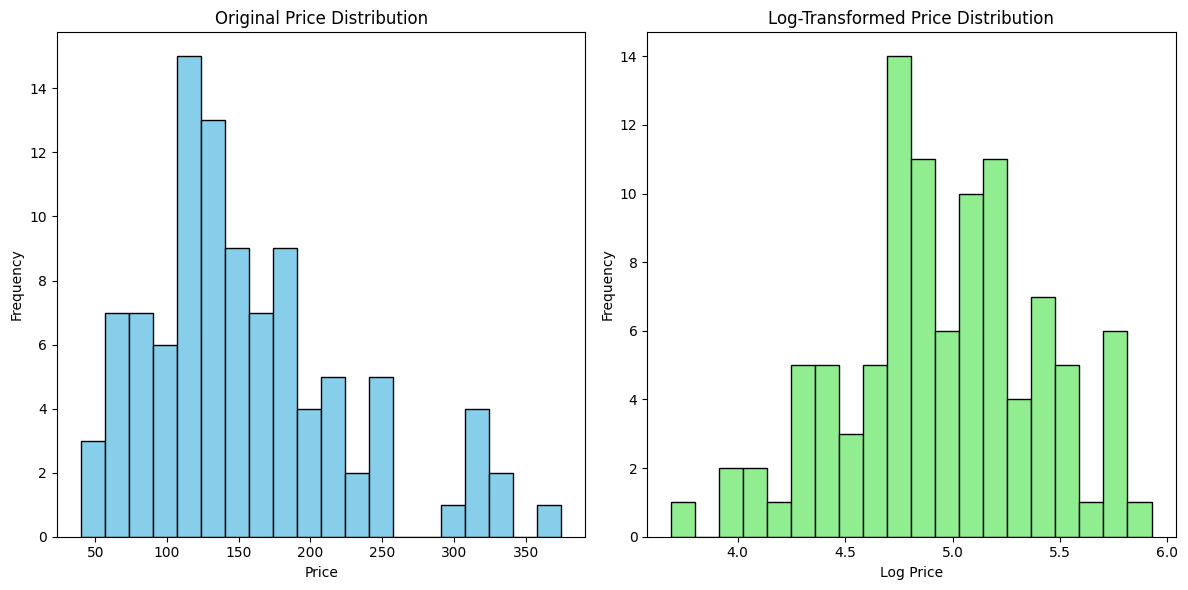

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 랜덤한 금융 데이터 생성 (주식 가격)
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=100)
prices = np.random.lognormal(mean=5, sigma=0.5, size=len(dates))

# DataFrame 생성
df = pd.DataFrame({'Date': dates, 'Price': prices})
df.set_index('Date', inplace=True)

# 로그 변환 적용
df['LogPrice'] = np.log(df['Price'])

# 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터 (로그 변환 전)
plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 로그 변환된 데이터
plt.subplot(1, 2, 2)
plt.hist(df['LogPrice'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 삼성전자의 일별 주가 데이터를 활용

In [ ]:
pip install pandas==1.5.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


[*********************100%***********************]  1 of 1 completed


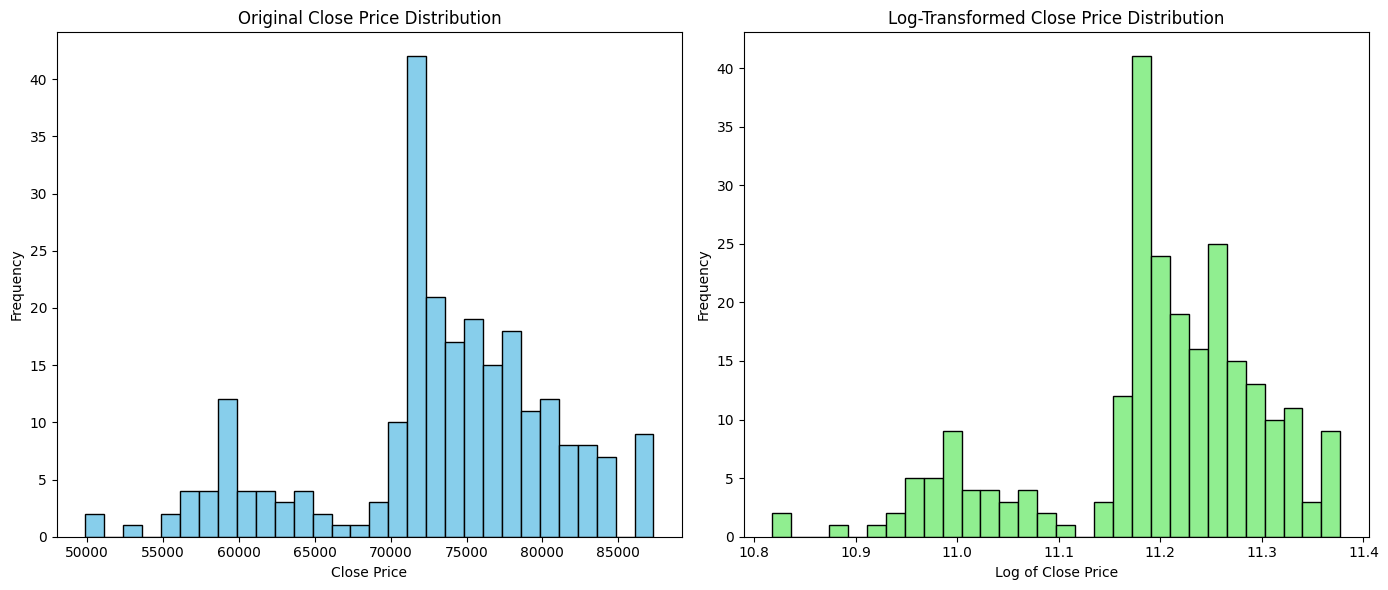

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 티커 심볼
ticker = '005930.KS'

# 데이터 다운로드 (최근 1년치)
df = yf.download(ticker, start='2023-11-15', end='2024-11-15', auto_adjust=True)

# 'Dividends'와 'Stock Splits' 컬럼이 있는지 확인하고 결측치 처리
if 'Dividends' in df.columns:
    df['Dividends'] = df['Dividends'].fillna(0)

if 'Stock Splits' in df.columns:
    df['Stock Splits'] = df['Stock Splits'].fillna(0)

# 종가 열에 로그 변환 적용
df['LogClose'] = np.log(df['Close'].replace(0, np.nan))

# 시각화
plt.figure(figsize=(14, 6))

# 로그 변환 전 종가 분포
plt.subplot(1, 2, 1)
plt.hist(df['Close'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Original Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# 로그 변환 후 종가 분포
plt.subplot(1, 2, 2)
plt.hist(df['LogClose'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Close Price Distribution')
plt.xlabel('Log of Close Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


결과 해석
위의 히스토그램을 통해 로그 변환 전후의 종가 분포를 비교할 수 있습니다.

로그 변환 전의 데이터는 오른쪽으로 치우친 분포를 보일 수 있으며,

로그 변환 후에는 분포가 더 대칭적으로 변하여 정규분포에 가까워지는 경향을 확인할 수 있습니다.

    이러한 변환은 데이터 분석 및 모델링 과정에서 데이터의 특성을 개선하는 데 도움이 됩니다.

[*********************100%***********************]  1 of 1 completed


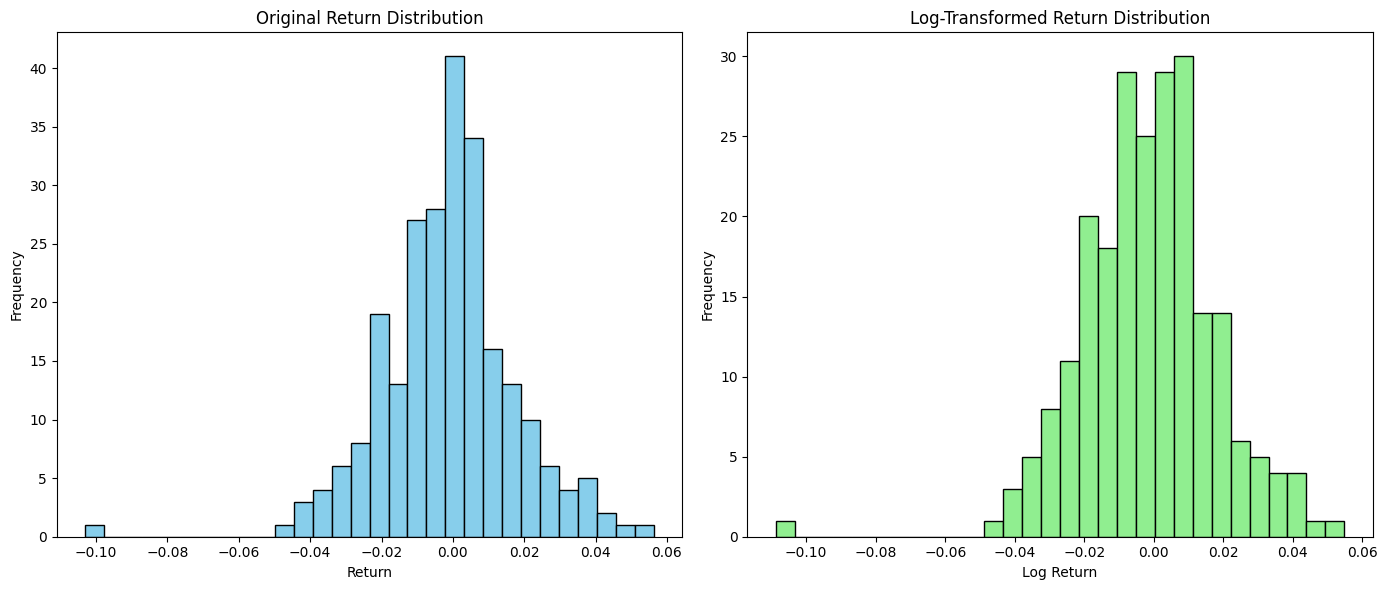

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 티커 심볼
ticker = '005930.KS'

# 데이터 다운로드 (최근 1년치)
df = yf.download(ticker, start='2023-11-15', end='2024-11-15', auto_adjust=True)

# 결측치 처리 (Dividends, Stock Splits 체크)
if 'Dividends' in df.columns:
    df['Dividends'] = df['Dividends'].fillna(0)

if 'Stock Splits' in df.columns:
    df['Stock Splits'] = df['Stock Splits'].fillna(0)

# 종가 변화율 계산
df['Return'] = df['Close'].pct_change()

# 로그 변환 적용 (변화율 데이터에)
df['LogReturn'] = np.log(df['Return'].replace(0, np.nan) + 1)

# 시각화
plt.figure(figsize=(14, 6))

# 종가 변화율 분포
plt.subplot(1, 2, 1)
plt.hist(df['Return'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Original Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')

# 로그 변환된 종가 변화율 분포
plt.subplot(1, 2, 2)
plt.hist(df['LogReturn'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Log-Transformed Return Distribution')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# **종가 변화율(Return)**은 각 거래일의 종가가 이전 거래일의 종가에 비해 얼마나 변동했는지를 나타냅니다.

# pct_change() 함수 계산

# 보통 금융 데이터의 종가 변화율은 오른쪽으로 치우친(skewed) 분포를 보일 수 있으며, 특히 **극단적인 값(outliers)**이 나타날 수 있습니다.

# 변화율이 0에 가까운 경우가 많고, 극단적인 상승 또는 하락이 있을 때는 히스토그램의 양쪽 끝에 위치하게 됩니다.

In [ ]:
# 오른쪽 그래프 (로그 변환된 종가 변화율 분포):

# **로그 변환(Log Transformation)**이 적용된 변화율(Log Return)의 분포입니다.

# 단순수익률과 로그수익률

In [6]:
import numpy as np

# 이전 시점의 가격과 현재 시점의 가격
previous_price = 100
current_price = 105

# 일반 수익률 계산
simple_return = (current_price - previous_price) / previous_price

# 로그 수익률 계산 (자연로그 사용)
log_return = np.log(current_price / previous_price)

print(f"Simple Return: {simple_return:.4f}")
print(f"Log Return: {log_return:.4f}")


Simple Return: 0.0500
Log Return: 0.0488


# 삼성전자의 로그 수익률

In [ ]:
# 코드 설명
# 로그 수익률 계산:

# 로그 수익률은 np.log(df['Close'] / df['Close'].shift(1))로 계산합니다.
# 이는 연속적인 수익률을 나타내며, 복리 효과를 반영합니다.
# 시각화:

# 히스토그램: 로그 수익률의 분포를 보여줍니다.
# 시간 변화 그래프: 시간에 따른 로그 수익률의 변화를 보여줍니다.

[*********************100%***********************]  1 of 1 completed


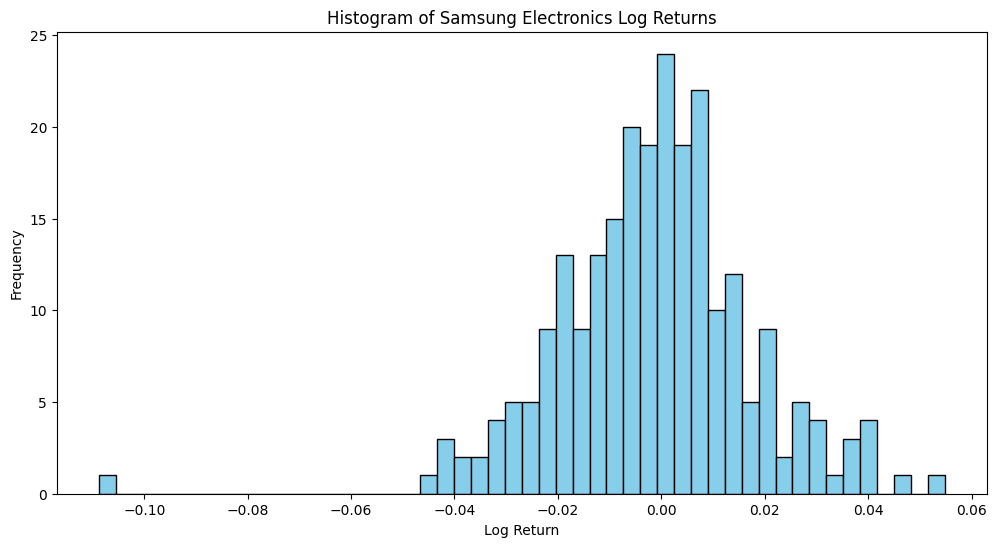

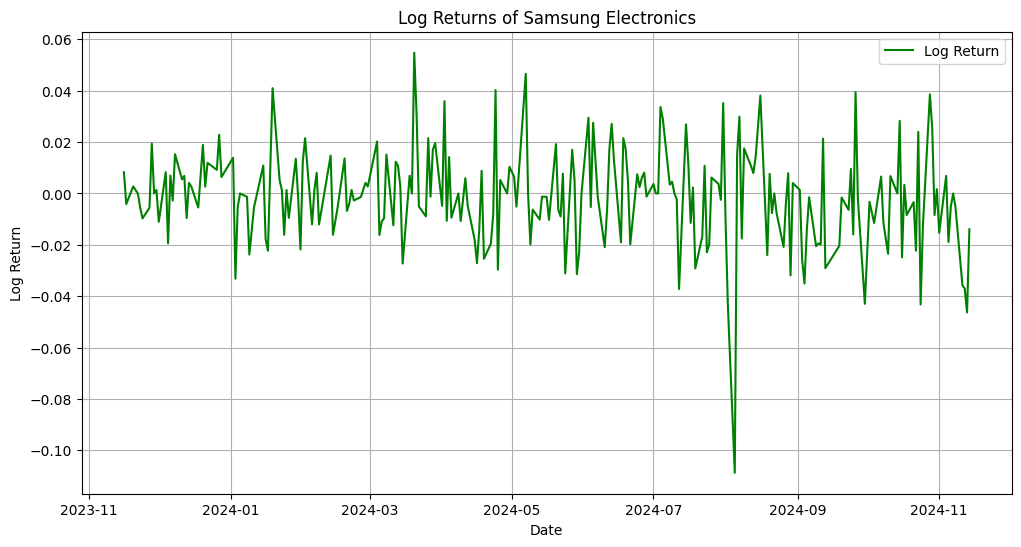

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 삼성전자 티커 심볼
ticker = '005930.KS'

# 1년간 주가 데이터 다운로드
df = yf.download(ticker, start='2023-11-15', end='2024-11-15', auto_adjust=True)

# 종가 변화율 계산 (로그 수익률)
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))

# 로그 수익률 히스토그램
plt.figure(figsize=(12, 6))
plt.hist(df['LogReturn'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Samsung Electronics Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')

# 로그 수익률 시간 변화 그래프
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LogReturn'], color='green', label='Log Return')
plt.title('Log Returns of Samsung Electronics')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()

plt.show()


[*********************100%***********************]  1 of 1 completed


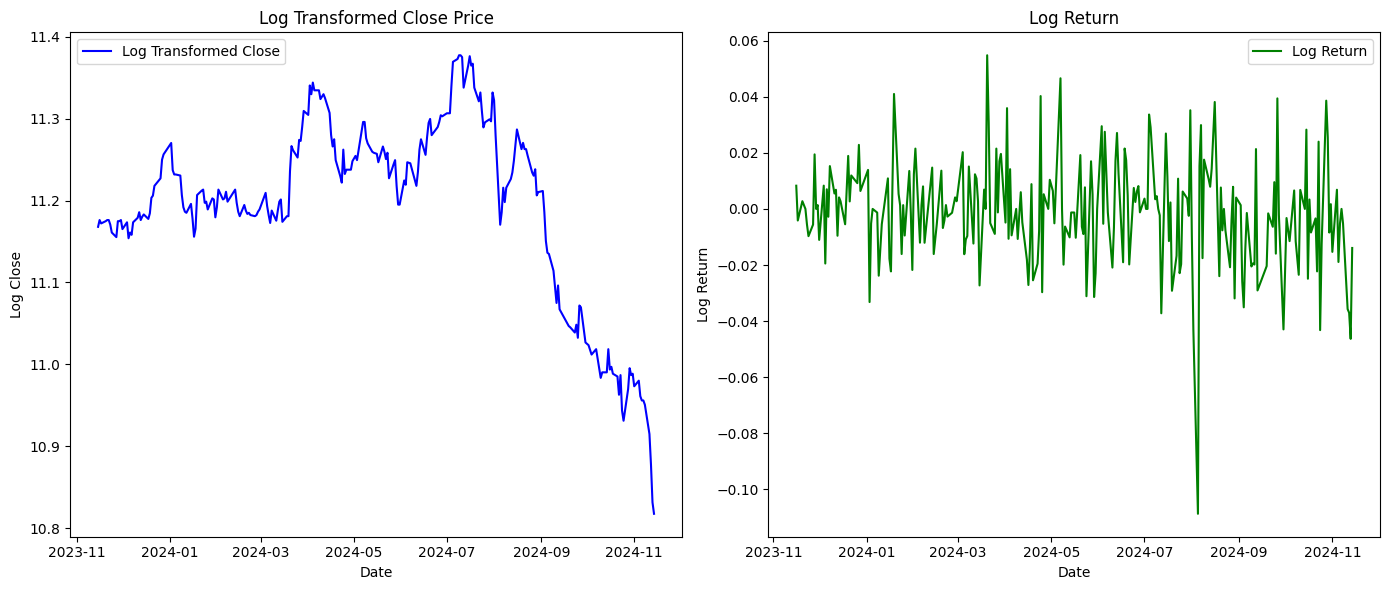

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 삼성전자 주가 데이터 다운로드
ticker = '005930.KS'
df = yf.download(ticker, start='2023-11-15', end='2024-11-15', auto_adjust=True)

# 로그 변환 (종가)
df['LogClose'] = np.log(df['Close'])

# 로그 수익률 계산
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))

# 시각화
plt.figure(figsize=(14, 6))

# 로그 변환 종가 시각화
plt.subplot(1, 2, 1)
plt.plot(df['LogClose'], color='blue', label='Log Transformed Close')
plt.title('Log Transformed Close Price')
plt.xlabel('Date')
plt.ylabel('Log Close')
plt.legend()

# 로그 수익률 시각화
plt.subplot(1, 2, 2)
plt.plot(df['LogReturn'], color='green', label='Log Return')
plt.title('Log Return')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()

plt.tight_layout()
plt.show()
